## Load Data

In [1]:
import os
import pandas as pd
import numpy as np


def load_data(path):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    use_cols = ['age1',
                'yield', 'sale', 'value',
                'land', 
                'cvl00', 'cvl01', 'cvl02', 'cvl03',
                'cvl10', 'cvl11', 'cvl12', 'cvl13',
                'pl00', 'pl01', 'pl02', 'pl03',
                'pl10', 'pl11', 'pl12', 'pl13',
                'size', # catecorical variable
                'cony'] # dependent variable

    dataframe_list = []
    for year in years[:7]:
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀1).xlsx')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀2).xlsx')
        
        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)
        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape)
    
    for year in years[7:9]:
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀 1).xls')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀 2).xls')
        
        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)
        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape)
    
    
    file_path = os.path.join(path, str(years[9])+'년', str(years[9])+'년 임산물생산비조사_통합 데이터_1. 밤.xlsx')
    forest_2019 = pd.read_excel(file_path)
    dataframe_list.append(forest_data.loc[:,use_cols])
    print(2019, forest_2019.shape)
    
    data = pd.concat(dataframe_list, axis=0)
    
    return data
    
data = load_data('./임산물생산비조사 마이크로데이터(2010-2019)')

2010 (216, 416)
2011 (209, 416)
2012 (216, 416)
2013 (220, 416)
2014 (255, 416)
2015 (258, 416)
2016 (252, 416)
2017 (253, 416)
2018 (231, 416)
2019 (226, 432)


In [2]:
y_data = np.log1p(data['cony'])

## Categorical Variable processing

In [3]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['size']
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(data.loc[:, categorical_variables])
onehot = onehot_encoder.fit_transform(data.loc[:, categorical_variables])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([1, 2, 3, 4])]
(2341, 4)


## Numerical Variable processing

In [4]:
from sklearn.preprocessing import MinMaxScaler

numerical_variables = ['age1',
                'yield', 'sale', 'value',
                'land', 
                'cvl00', 'cvl01', 'cvl02', 'cvl03',
                'cvl10', 'cvl11', 'cvl12', 'cvl13',
                'pl00', 'pl01', 'pl02', 'pl03',
                'pl10', 'pl11', 'pl12', 'pl13']
X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(data.loc[:, numerical_variables])
X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
X_scaled

array([[0.64814815, 0.15429508, 0.15255341, ..., 0.        , 0.        ,
        0.8175    ],
       [0.59259259, 0.02148977, 0.01968618, ..., 0.        , 0.        ,
        0.01      ],
       [0.55555556, 0.01901736, 0.01770309, ..., 0.        , 0.        ,
        0.0525    ],
       ...,
       [0.38888889, 0.15869365, 0.0712466 , ..., 0.        , 0.        ,
        0.        ],
       [0.55555556, 0.49591766, 0.32111632, ..., 0.        , 0.        ,
        0.6       ],
       [0.57407407, 0.15704059, 0.16581263, ..., 0.        , 0.        ,
        0.2       ]])

In [5]:
numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,age1,yield,sale,value,land,cvl00,cvl01,cvl02,cvl03,cvl10,...,pl02,pl03,pl10,pl11,pl12,pl13,0,1,2,3
0,0.648148,0.154295,0.152553,0.058183,0.832995,0.120390,0.0,0.0,0.126065,0.126065,...,0.0,0.8175,0.8175,0.0,0.0,0.8175,0.0,0.0,0.0,1.0
1,0.592593,0.021490,0.019686,0.007400,0.832995,0.047403,0.0,0.0,0.053548,0.009677,...,0.0,0.0765,0.0100,0.0,0.0,0.0100,1.0,0.0,0.0,0.0
2,0.555556,0.019017,0.017703,0.005590,0.832995,0.000325,0.0,0.0,0.006774,0.006774,...,0.0,0.0525,0.0525,0.0,0.0,0.0525,1.0,0.0,0.0,0.0
3,0.592593,0.067430,0.066166,0.026664,0.832995,0.021818,0.0,0.0,0.028129,0.002581,...,0.0,0.2180,0.0200,0.0,0.0,0.0200,0.0,0.0,1.0,0.0
4,0.629630,0.037230,0.034306,0.019680,0.832995,0.001039,0.0,0.0,0.007484,0.007484,...,0.0,0.0580,0.0580,0.0,0.0,0.0580,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,0.444444,0.099198,0.000666,0.100299,0.141636,0.009740,0.0,0.0,0.016129,0.000000,...,0.0,0.1250,0.0000,0.0,0.0,0.0000,0.0,1.0,0.0,0.0
2337,0.462963,0.144650,0.116525,0.118629,0.141636,0.019481,0.0,0.0,0.025806,0.000000,...,0.0,0.2000,0.0000,0.0,0.0,0.0000,0.0,0.0,1.0,0.0
2338,0.388889,0.158694,0.071247,0.088690,0.141636,0.032468,0.0,0.0,0.038710,0.000000,...,0.0,0.3000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,1.0
2339,0.555556,0.495918,0.321116,0.805852,0.141636,0.071429,0.0,0.0,0.077419,0.077419,...,0.0,0.6000,0.6000,0.0,0.0,0.6000,0.0,0.0,0.0,1.0


In [6]:
X_data = np.array(X_data_df)
y_data = np.array(y_data)

# K-Fold

## RandomForest

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

seed = 1234
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

tuple_list = []
for i, (train_idx, test_idx) in enumerate(kf.split(X_data)):
    print('Fold {}'.format(i))
    
    X_train, y_train = X_data[train_idx], y_data[train_idx]
    X_test, y_test = X_data[test_idx], y_data[test_idx]

    # n_estimators
    for j in [100, 300, 500, 1000, 2000]:
        rf = RandomForestRegressor(n_estimators = j, max_features = 'sqrt', random_state=seed)
        rf.fit(X_train, y_train)
        preds = rf.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        tuple_list.append((i,j,mse))

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


In [9]:
MSE_df = pd.DataFrame(columns = ['Fold', 'n_estimators', 'MSE'])
for i, j, mse in tuple_list:
    MSE_df = MSE_df.append({'Fold' : i,
                            'n_estimators' : j,
                            'MSE' : mse}, ignore_index=True)
MSE_df.head(10)

,Fold,n_estimators,MSE
0,0.0,100.0,0.025652
1,0.0,300.0,0.024931
2,0.0,500.0,0.025299
3,0.0,1000.0,0.024615
4,0.0,2000.0,0.024065
5,1.0,100.0,0.042017
6,1.0,300.0,0.041492
7,1.0,500.0,0.042658
8,1.0,1000.0,0.043860
9,1.0,2000.0,0.043897


In [10]:
MSE_df.groupby('n_estimators').mean().sort_values(by='MSE')

,Fold,MSE
n_estimators,,
2000.0,2.0,0.033012
300.0,2.0,0.033052
1000.0,2.0,0.033567
500.0,2.0,0.033658
100.0,2.0,0.033845


## Ridge

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

seed = 1234
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

tuple_list = []
for i, (train_idx, test_idx) in enumerate(kf.split(X_data)):
    print('Fold {}'.format(i))
    
    X_train, y_train = X_data[train_idx], y_data[train_idx]
    X_test, y_test = X_data[test_idx], y_data[test_idx]

    # n_estimators
    for j in np.linspace(0.01, 2):
        ridge = Ridge(alpha=j)
        ridge.fit(X_train, y_train)
        preds = ridge.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        tuple_list.append((i,j,mse))

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


In [19]:
MSE_df = pd.DataFrame(columns = ['Fold', 'alpha', 'MSE'])
for i, j, mse in tuple_list:
    MSE_df = MSE_df.append({'Fold' : i,
                            'alpha' : j,
                            'MSE' : mse}, ignore_index=True)
MSE_df.head(10)

,Fold,alpha,MSE
0,0.0,0.010000,0.428697
1,0.0,0.050612,0.428663
2,0.0,0.091224,0.428902
3,0.0,0.131837,0.429313
4,0.0,0.172449,0.429841
5,0.0,0.213061,0.430448
6,0.0,0.253673,0.431109
7,0.0,0.294286,0.431804
8,0.0,0.334898,0.432522
9,0.0,0.375510,0.433254


Fold    2.000000
MSE     0.562651
Name: 0.17244897959183675, dtype: float64


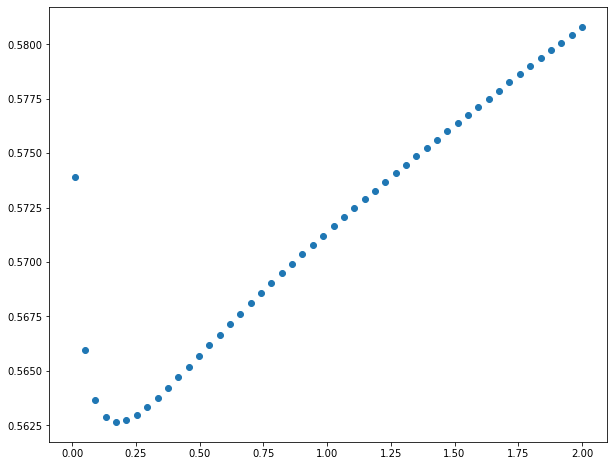

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
cv_result = MSE_df.groupby('alpha').mean()
print(cv_result.iloc[cv_result['MSE'].argmin(), :])
plt.scatter(x=np.linspace(0.01, 2),
         y=cv_result['MSE'])

## LASSO

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

seed = 1234
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

tuple_list = []
for i, (train_idx, test_idx) in enumerate(kf.split(X_data)):
    print('Fold {}'.format(i))
    
    X_train, y_train = X_data[train_idx], y_data[train_idx]
    X_test, y_test = X_data[test_idx], y_data[test_idx]

    # n_estimators
    for j in np.linspace(0.001, 1):
        lasso = Lasso(alpha=j)
        lasso.fit(X_train, y_train)
        preds = lasso.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        tuple_list.append((i,j,mse))

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


In [25]:
MSE_df = pd.DataFrame(columns = ['Fold', 'alpha', 'MSE'])
for i, j, mse in tuple_list:
    MSE_df = MSE_df.append({'Fold' : i,
                            'alpha' : j,
                            'MSE' : mse}, ignore_index=True)
MSE_df.head(10)

,Fold,alpha,MSE
0,0.0,0.001000,0.435505
1,0.0,0.021388,0.706003
2,0.0,0.041776,0.827078
3,0.0,0.062163,0.827078
4,0.0,0.082551,0.827078
5,0.0,0.102939,0.827078
6,0.0,0.123327,0.827078
7,0.0,0.143714,0.827078
8,0.0,0.164102,0.827078
9,0.0,0.184490,0.827078


Fold    2.000000
MSE     0.565296
Name: 0.001, dtype: float64


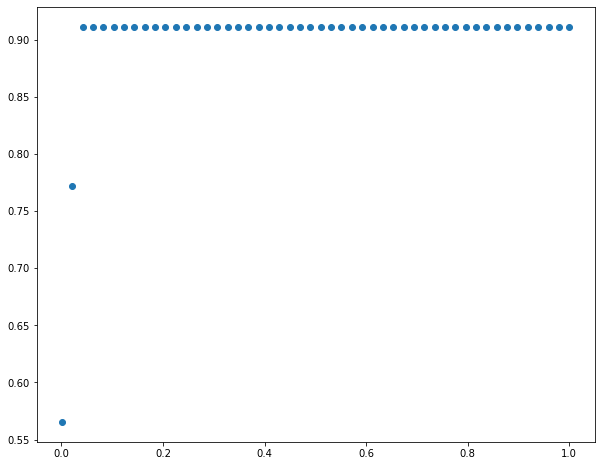

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
cv_result = MSE_df.groupby('alpha').mean()
print(cv_result.iloc[cv_result['MSE'].argmin(), :])
plt.scatter(x=np.linspace(0.001, 1),
         y=cv_result['MSE'])

## GBM

In [45]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

seed = 1234
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

tuple_list = []
for i, (train_idx, test_idx) in enumerate(kf.split(X_data)):
    print('Fold {}'.format(i))
    
    X_train, y_train = X_data[train_idx], y_data[train_idx]
    X_test, y_test = X_data[test_idx], y_data[test_idx]

    # GBM
    for j in [8, 10, 15, 20, 30]:
        gbm = GradientBoostingRegressor(n_estimators=500, max_depth=j)
        gbm.fit(X_train, y_train)
        preds = gbm.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        tuple_list.append((i,j,mse))

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


In [46]:
MSE_df = pd.DataFrame(columns = ['Fold', 'n_estimators', 'MSE'])
for i, j, mse in tuple_list:
    MSE_df = MSE_df.append({'Fold' : i,
                            'n_estimators' : j,
                            'MSE' : mse}, ignore_index=True)
MSE_df.head(10)

,Fold,n_estimators,MSE
0,0.0,8.0,0.004139
1,0.0,10.0,0.007067
2,0.0,15.0,0.010300
3,0.0,20.0,0.010489
4,0.0,30.0,0.010552
5,1.0,8.0,0.005757
6,1.0,10.0,0.008176
7,1.0,15.0,0.011688
8,1.0,20.0,0.011248
9,1.0,30.0,0.010887


In [47]:
MSE_df.groupby('n_estimators').mean().sort_values(by='MSE')

,Fold,MSE
n_estimators,,
8.0,2.0,0.005335
10.0,2.0,0.008103
20.0,2.0,0.011801
30.0,2.0,0.012093
15.0,2.0,0.012137


## XGBoost

In [66]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

seed = 1234
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

tuple_list = []
for i, (train_idx, test_idx) in enumerate(kf.split(X_data)):
    print('Fold {}'.format(i))
    
    X_train, y_train = X_data[train_idx], y_data[train_idx]
    X_test, y_test = X_data[test_idx], y_data[test_idx]

    # XGBoost
    for j in [0.5, 0.6, 0.7, 0.8, 0.9]:
        xgb_reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.08,
                                   max_depth=8, gamma=0,
                                   subsample = 0.7, colsample_bytree=j,
                                   random_state=seed)
        xgb_reg.fit(X_train, y_train)
        preds = xgb_reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        tuple_list.append((i,j,mse))

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


In [67]:
MSE_df = pd.DataFrame(columns = ['Fold', 'n_estimators', 'MSE'])
for i, j, mse in tuple_list:
    MSE_df = MSE_df.append({'Fold' : i,
                            'n_estimators' : j,
                            'MSE' : mse}, ignore_index=True)
MSE_df.head(10)

,Fold,n_estimators,MSE
0,0.0,0.5,0.006319
1,0.0,0.6,0.003932
2,0.0,0.7,0.003507
3,0.0,0.8,0.003235
4,0.0,0.9,0.003644
5,1.0,0.5,0.007813
6,1.0,0.6,0.005565
7,1.0,0.7,0.004108
8,1.0,0.8,0.003688
9,1.0,0.9,0.003659


In [68]:
MSE_df.groupby('n_estimators').mean().sort_values(by='MSE')

,Fold,MSE
n_estimators,,
0.8,2.0,0.003060
0.9,2.0,0.003113
0.7,2.0,0.003305
0.6,2.0,0.004176
0.5,2.0,0.006475


## LightGBM

In [42]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

seed = 1234
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

tuple_list = []
for i, (train_idx, test_idx) in enumerate(kf.split(X_data)):
    print('Fold {}'.format(i))
    
    X_train, y_train = X_data[train_idx], y_data[train_idx]
    X_test, y_test = X_data[test_idx], y_data[test_idx]

    # LightGBM
    for j in [10, 20, 30, 50, 100]:
        lgb_reg = lgb.LGBMRegressor(n_estimators=1000,
                                    max_depth = 50, num_leaves = 10,
                                    min_data_in_leaf = j,
                                   random_state=seed)
        lgb_reg.fit(X_train, y_train)
        preds = lgb_reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        tuple_list.append((i,j,mse))

Fold 0
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
Fold 1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGB

In [43]:
MSE_df = pd.DataFrame(columns = ['Fold', 'n_estimators', 'MSE'])
for i, j, mse in tuple_list:
    MSE_df = MSE_df.append({'Fold' : i,
                            'n_estimators' : j,
                            'MSE' : mse}, ignore_index=True)
MSE_df.head(10)

,Fold,n_estimators,MSE
0,0.0,10.0,0.004011
1,0.0,20.0,0.007959
2,0.0,30.0,0.022049
3,0.0,50.0,0.040655
4,0.0,100.0,0.082308
5,1.0,10.0,0.027861
6,1.0,20.0,0.051434
7,1.0,30.0,0.063800
8,1.0,50.0,0.075068
9,1.0,100.0,0.132168


In [44]:
MSE_df.groupby('n_estimators').mean().sort_values(by='MSE')

,Fold,MSE
n_estimators,,
10.0,2.0,0.021654
20.0,2.0,0.026097
30.0,2.0,0.043315
50.0,2.0,0.059405
100.0,2.0,0.107227
